# Read Light Curves

This notebook reads the light curve data from the `1_Light_Curves` directory using `h5py` and visualizes the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
time, flux_white, flux_err_white, flux, flux_err, wl, flux_white_raw, flux_err_white_raw, flux_raw, flux_err_raw = np.load('data/WASP43b_NIRSpec.npz').values()

In [3]:
# mask = flux_white > 0.99
# time = time[mask]
# flux_white = flux_white[mask]
# err_white = err_white[mask]

In [4]:
# # Plot Spectral Light Curves for a few wavelengths
# plt.figure(figsize=(12, 8))

# # Plot first, middle, and last wavelength channels
# indices = [0, len(wavelength)//2, len(wavelength)-1]

# for i in indices:
#     plt.plot(time, flux[i], '.', alpha=0.5, label=f'{wavelength[i]:.2f} $\mu$m')

# plt.title('Spectral Light Curves')
# plt.xlabel('Time (BJD)')
# plt.ylabel('Flux')
# plt.legend()
# plt.show()

In [5]:
# Star Parameters (Source: S5_WASP-43b_fitpar_starry_white.epf / Nature Astronomy 2024)
m_star = 0.6916
m_planet = 2.034 * 1.898e27 / 1.98847e30
R_sun = 6.957e8  # Radius of Sun in meters
R_J = 6.9911e7  # Radius of Jupiter in meters

r_star = 0.665
r_planet = 1.049 * R_J / R_sun
A = dict(
    ydeg=1,  
    udeg=2,  
    inc=90,  
    amp=1.0, 
    r=r_star, 
    m=m_star, 
    prot=100.0,
    u=[0.044, 0.27],  # u1, u2 from epf file
)

# Planet Parameters (WASP-43b)
porb = 0.81347406 # Period from epf file
t0_ref = 55934.2922503 # BJD from epf file (55934 + 2400000.5)

# t0_ref = 55934 + 2400000.5

B = dict(
    ydeg=6,
    udeg=2,
    inc=82.155,  # inc from epf file
    r=r_planet,
    m=m_planet,  # Mass often negligible for light curve geometry (setting to 0 or keeping small)
    porb=porb,
    prot=porb,
    t0=t0_ref,
    u=[0.0, 0.0], # Planet LD usually ignored or 0
    Omega=0,
    ecc=0.0,
    w=90, # Argument of periastron from epf file
)  

print(f"Using T0: {B['t0']}")
print(f"Using Period: {B['porb']}")

Using T0: 55934.2922503
Using Period: 0.81347406


In [6]:
import starry
from spectralmap.mapping import Map
starry.config.lazy = False
starry.config.quiet = True
pri = starry.Primary(
    starry.Map(ydeg=A["ydeg"], udeg=A["udeg"], inc=A["inc"]),
    r=A["r"],
    m=A["m"],
    prot=A["prot"],
)

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/opt/miniconda3/envs/spectralmap/lib/python3.9/site-packages/starry/_core/ops/limbdark/base_op.py:5: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/opt/miniconda3/envs/spectralmap/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
sec = starry.Secondary(
    starry.Map(ydeg=4, udeg=B["udeg"], inc=90), # planet inclination
    r=B["r"],
    m=B["m"],
    porb=B["porb"],
    prot=B["prot"],
    t0=B["t0"], # time of transit
    inc=B["inc"],
    theta0=180,  # phase offset in degrees
)

In [8]:
from spectralmap.mapping import make_map, make_maps
from spectralmap.mapping import make_maps

maps = make_maps(mode='eclipse', pri=pri, sec=sec, map_res=30, ydegs=np.arange(2, 6, 1), lambdas=np.logspace(7, 12, 10), eclipse_depth=0.003, a_lambda=1e-10, b_lambda=1e-10)

In [9]:
from spectralmap.mapping import LightCurveData
data = LightCurveData(theta = time, flux=flux_white, flux_err=flux_err_white, wl=np.array([0.65]))
w_all, I_white, I_cov_white = maps.marginalized_maps(data)

lambda:  10%|█         | 1/10 [00:09<01:24,  9.37s/it]

lambda=10000000.0: Best-evidence wavelength counts by ydeg: ydeg=2: 0, ydeg=3: 1, ydeg=4: 0, ydeg=5: 0


ydeg: 100%|██████████| 4/4 [00:00<00:00, 78.46it/s, wl 1/1]


lambda=35938136.63804626: Best-evidence wavelength counts by ydeg: ydeg=2: 0, ydeg=3: 1, ydeg=4: 0, ydeg=5: 0


lambda:  30%|███       | 3/10 [00:09<00:17,  2.47s/it]

lambda=129154966.50148827: Best-evidence wavelength counts by ydeg: ydeg=2: 0, ydeg=3: 1, ydeg=4: 0, ydeg=5: 0


ydeg: 100%|██████████| 4/4 [00:00<00:00, 70.44it/s, wl 1/1]


lambda=464158883.3612773: Best-evidence wavelength counts by ydeg: ydeg=2: 1, ydeg=3: 0, ydeg=4: 0, ydeg=5: 0


lambda:  50%|█████     | 5/10 [00:09<00:06,  1.23s/it]

lambda=1668100537.2000558: Best-evidence wavelength counts by ydeg: ydeg=2: 1, ydeg=3: 0, ydeg=4: 0, ydeg=5: 0


ydeg: 100%|██████████| 4/4 [00:00<00:00, 63.92it/s, wl 1/1]


lambda=5994842503.189421: Best-evidence wavelength counts by ydeg: ydeg=2: 1, ydeg=3: 0, ydeg=4: 0, ydeg=5: 0


lambda:  70%|███████   | 7/10 [00:09<00:02,  1.35it/s]

lambda=21544346900.318867: Best-evidence wavelength counts by ydeg: ydeg=2: 0, ydeg=3: 0, ydeg=4: 1, ydeg=5: 0


ydeg: 100%|██████████| 4/4 [00:00<00:00, 59.31it/s, wl 1/1]


lambda=77426368268.11278: Best-evidence wavelength counts by ydeg: ydeg=2: 0, ydeg=3: 0, ydeg=4: 1, ydeg=5: 0


lambda:  90%|█████████ | 9/10 [00:09<00:00,  2.03it/s]

lambda=278255940220.7126: Best-evidence wavelength counts by ydeg: ydeg=2: 0, ydeg=3: 0, ydeg=4: 1, ydeg=5: 0


lambda: 100%|██████████| 10/10 [00:10<00:00,  1.00s/it]


lambda=1000000000000.0: Best-evidence wavelength counts by ydeg: ydeg=2: 0, ydeg=3: 0, ydeg=4: 1, ydeg=5: 0
Best-evidence wavelength counts by ydeg: ydeg=2: 0, ydeg=3: 1, ydeg=4: 0, ydeg=5: 0


Using broadband ranges: 2.87–3.72 and 3.82–5.18 micron
Selected bins: 2
Depth range (mean map): 5.745e-06 to 4.555e-03
Substellar Tb estimate (lon~0, lat~0): 1783.7 K


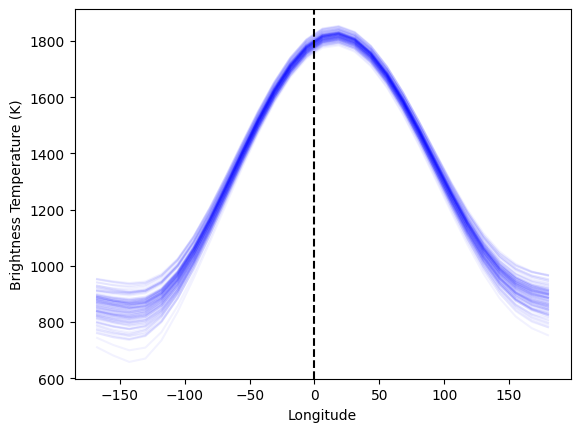

Text(0, 0.5, 'Brightness Temperature (K)')

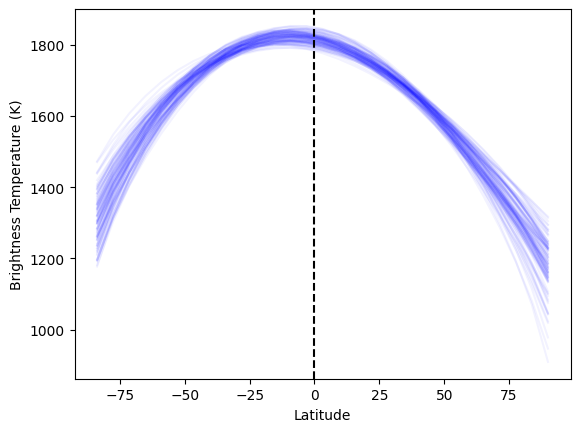

In [10]:
import importlib
import spectralmap.utilities as sm_utils
sm_utils = importlib.reload(sm_utils)

expand_moll_values = sm_utils.expand_moll_values
depth_to_tb_broadband = sm_utils.depth_to_tb_broadband

I_plot = I_white[0]
I_cov_plot = I_cov_white[0]
N = 100
samples = np.random.multivariate_normal(I_plot, I_cov_plot, N)

n_lat, n_lon = maps.map_res, maps.map_res
lons, lats = np.linspace(-180, 180, n_lon), np.linspace(-90, 90, n_lat)

# Use specified NIRSpec broadband windows
# 2.87–3.72 micron and 3.82–5.18 micron
wl_band = np.array([(2.87 + 3.72) / 2, (3.82 + 5.18) / 2], dtype=float)
dlam_band = np.array([3.72 - 2.87, 5.18 - 3.82], dtype=float)

RpRs = 0.1588

# Quick diagnostics to catch inflated temperatures
I_mean_map = expand_moll_values(I_plot, maps.moll_mask_flat).reshape(n_lat, n_lon)
depth_mean_map = np.pi * I_mean_map
Tb_mean_map = depth_to_tb_broadband(depth_mean_map, wl_band, dlam_band, RpRs, t_star=4500.0)
i_lat0 = int(np.argmin(np.abs(lats)))
i_lon0 = int(np.argmin(np.abs(lons)))
print("Using broadband ranges: 2.87–3.72 and 3.82–5.18 micron")
print(f"Selected bins: {wl_band.size}")
print(f"Depth range (mean map): {np.nanmin(depth_mean_map):.3e} to {np.nanmax(depth_mean_map):.3e}")
print(f"Substellar Tb estimate (lon~0, lat~0): {Tb_mean_map[i_lat0, i_lon0]:.1f} K")

for i in range(N):
    I_slice = expand_moll_values(samples[i], maps.moll_mask_flat).reshape(n_lat, n_lon)[n_lat // 2]
    depth_slice = np.pi * I_slice
    Tb_slice = depth_to_tb_broadband(depth_slice, wl_band, dlam_band, RpRs, t_star=4500.0)
    finite = np.isfinite(Tb_slice)
    plt.plot(lons[finite], Tb_slice[finite], c='b', alpha=0.05)
plt.axvline(0, color='k', linestyle='--', linewidth=1.5)
plt.xlabel('Longitude')
plt.ylabel('Brightness Temperature (K)')

plt.show()
for i in range(N):
    I_slice = expand_moll_values(samples[i], maps.moll_mask_flat).reshape(n_lat, n_lon)[:, n_lon // 2]
    depth_slice = np.pi * I_slice
    Tb_slice = depth_to_tb_broadband(depth_slice, wl_band, dlam_band, RpRs, t_star=4500.0)
    finite = np.isfinite(Tb_slice)
    plt.plot(lats[finite], Tb_slice[finite], c='b', alpha=0.05)
plt.axvline(0, color='k', linestyle='--', linewidth=1.5)
plt.xlabel('Latitude')
plt.ylabel('Brightness Temperature (K)')

In [12]:
from spectralmap.mapping import Map, Maps
maps = make_maps(mode='eclipse', pri=pri, sec=sec, map_res=30, ydegs=np.arange(2, 5, 1), lambdas=np.logspace(4, 9, 20), eclipse_depth=0.0045, a_lambda=1e-10, b_lambda=1e-10)
data = LightCurveData(theta = time, flux=flux, flux_err=flux_err, wl=wl)
w_all, I_all_wl, I_cov_all_wl = maps.marginalized_maps(data, sigma_threshold=0.2)

lambda:   5%|▌         | 1/20 [00:02<00:46,  2.46s/it]

lambda=10000.0: Best-evidence wavelength counts by ydeg: ydeg=2: 0, ydeg=3: 2, ydeg=4: 0


ydeg: 100%|██████████| 3/3 [00:00<00:00, 33.62it/s, wl 2/2]


lambda=18329.807108324374: Best-evidence wavelength counts by ydeg: ydeg=2: 0, ydeg=3: 2, ydeg=4: 0


lambda:  15%|█▌        | 3/20 [00:02<00:12,  1.41it/s]

lambda=33598.18286283781: Best-evidence wavelength counts by ydeg: ydeg=2: 0, ydeg=3: 2, ydeg=4: 0


ydeg: 100%|██████████| 3/3 [00:00<00:00, 33.49it/s, wl 2/2]


lambda=61584.82110660267: Best-evidence wavelength counts by ydeg: ydeg=2: 0, ydeg=3: 2, ydeg=4: 0


lambda:  25%|██▌       | 5/20 [00:02<00:05,  2.58it/s]

lambda=112883.78916846884: Best-evidence wavelength counts by ydeg: ydeg=2: 0, ydeg=3: 2, ydeg=4: 0


ydeg: 100%|██████████| 3/3 [00:00<00:00, 38.08it/s, wl 2/2]


lambda=206913.808111479: Best-evidence wavelength counts by ydeg: ydeg=2: 1, ydeg=3: 1, ydeg=4: 0


lambda:  35%|███▌      | 7/20 [00:02<00:03,  3.85it/s]

lambda=379269.0190732254: Best-evidence wavelength counts by ydeg: ydeg=2: 1, ydeg=3: 1, ydeg=4: 0


ydeg: 100%|██████████| 3/3 [00:00<00:00, 34.77it/s, wl 2/2]


lambda=695192.7961775606: Best-evidence wavelength counts by ydeg: ydeg=2: 1, ydeg=3: 1, ydeg=4: 0


lambda:  45%|████▌     | 9/20 [00:03<00:02,  5.19it/s]

lambda=1274274.985703132: Best-evidence wavelength counts by ydeg: ydeg=2: 1, ydeg=3: 1, ydeg=4: 0


ydeg: 100%|██████████| 3/3 [00:00<00:00, 41.68it/s, wl 2/2]


lambda=2335721.4690901213: Best-evidence wavelength counts by ydeg: ydeg=2: 1, ydeg=3: 1, ydeg=4: 0


lambda:  55%|█████▌    | 11/20 [00:03<00:01,  6.59it/s]

lambda=4281332.3987193955: Best-evidence wavelength counts by ydeg: ydeg=2: 1, ydeg=3: 1, ydeg=4: 0


ydeg: 100%|██████████| 3/3 [00:00<00:00, 36.54it/s, wl 2/2]


lambda=7847599.703514607: Best-evidence wavelength counts by ydeg: ydeg=2: 1, ydeg=3: 1, ydeg=4: 0


lambda:  65%|██████▌   | 13/20 [00:03<00:00,  7.78it/s]

lambda=14384498.882876629: Best-evidence wavelength counts by ydeg: ydeg=2: 2, ydeg=3: 0, ydeg=4: 0


ydeg: 100%|██████████| 3/3 [00:00<00:00, 36.08it/s, wl 2/2]


lambda=26366508.987303555: Best-evidence wavelength counts by ydeg: ydeg=2: 2, ydeg=3: 0, ydeg=4: 0


lambda:  75%|███████▌  | 15/20 [00:03<00:00,  8.80it/s]

lambda=48329302.38571752: Best-evidence wavelength counts by ydeg: ydeg=2: 2, ydeg=3: 0, ydeg=4: 0


ydeg: 100%|██████████| 3/3 [00:00<00:00, 41.71it/s, wl 2/2]


lambda=88586679.04100832: Best-evidence wavelength counts by ydeg: ydeg=2: 2, ydeg=3: 0, ydeg=4: 0


lambda:  85%|████████▌ | 17/20 [00:03<00:00,  9.78it/s]

lambda=162377673.91887176: Best-evidence wavelength counts by ydeg: ydeg=2: 2, ydeg=3: 0, ydeg=4: 0


ydeg: 100%|██████████| 3/3 [00:00<00:00, 40.05it/s, wl 2/2]


lambda=297635144.1631313: Best-evidence wavelength counts by ydeg: ydeg=2: 2, ydeg=3: 0, ydeg=4: 0


lambda:  95%|█████████▌| 19/20 [00:03<00:00, 10.54it/s]

lambda=545559478.1168514: Best-evidence wavelength counts by ydeg: ydeg=2: 2, ydeg=3: 0, ydeg=4: 0


lambda: 100%|██████████| 20/20 [00:04<00:00,  4.94it/s]


lambda=1000000000.0: Best-evidence wavelength counts by ydeg: ydeg=2: 2, ydeg=3: 0, ydeg=4: 0
Best-evidence wavelength counts by ydeg: ydeg=2: 1, ydeg=3: 1, ydeg=4: 0


Using bin center = 3.295 micron, bin width = 0.8500 micron
Depth range (mean map): -3.204e-05 to 3.786e-03
Substellar Tb estimate (lon~0, lat~0): 1729.1 K


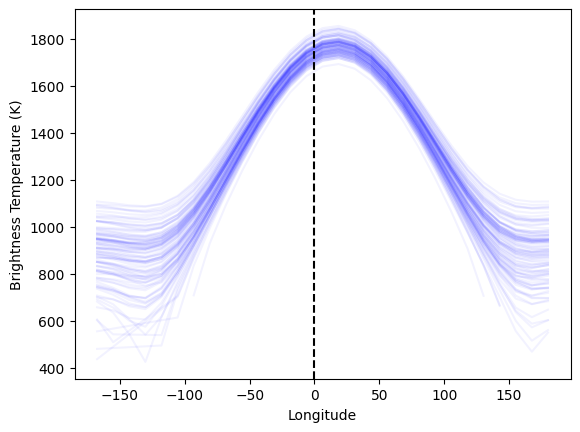

Text(0, 0.5, 'Brightness Temperature (K)')

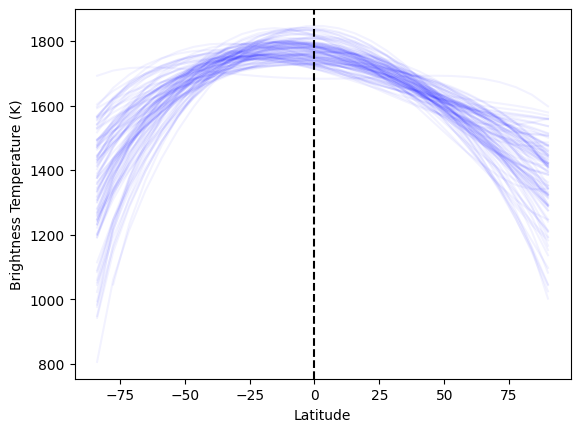

In [13]:
import importlib
import spectralmap.utilities as sm_utils
sm_utils = importlib.reload(sm_utils)

expand_moll_values = sm_utils.expand_moll_values
compute_bin_widths_from_centers = sm_utils.compute_bin_widths_from_centers
depth_to_tb_broadband = sm_utils.depth_to_tb_broadband

i_wl = 0
I_plot = I_all_wl[i_wl]
I_cov_plot = I_cov_all_wl[i_wl]
N = 100
samples = np.random.multivariate_normal(I_plot, I_cov_plot, N)

n_lat, n_lon = maps.map_res, maps.map_res
lons, lats = np.linspace(-180, 180, n_lon), np.linspace(-90, 90, n_lat)


wl_band_i_wl = wl_band[i_wl]
dlam_band_i_wl = dlam_band[i_wl]
RpRs = 0.1588

# Quick diagnostics to catch inflated temperatures
I_mean_map = expand_moll_values(I_plot, maps.moll_mask_flat).reshape(n_lat, n_lon)
depth_mean_map = np.pi * I_mean_map
Tb_mean_map = depth_to_tb_broadband(depth_mean_map, wl_band_i_wl, dlam_band_i_wl, RpRs, t_star=4500.0)
i_lat0 = int(np.argmin(np.abs(lats)))
i_lon0 = int(np.argmin(np.abs(lons)))
print(f"Using bin center = {wl_band_i_wl:.3f} micron, bin width = {dlam_band_i_wl:.4f} micron")
print(f"Depth range (mean map): {np.nanmin(depth_mean_map):.3e} to {np.nanmax(depth_mean_map):.3e}")
print(f"Substellar Tb estimate (lon~0, lat~0): {Tb_mean_map[i_lat0, i_lon0]:.1f} K")

for i in range(N):
    I_slice = expand_moll_values(samples[i], maps.moll_mask_flat).reshape(n_lat, n_lon)[n_lat // 2]
    depth_slice = np.pi * I_slice
    Tb_slice = depth_to_tb_broadband(depth_slice, wl_band_i_wl, dlam_band_i_wl, RpRs, t_star=4500.0)
    finite = np.isfinite(Tb_slice)
    plt.plot(lons[finite], Tb_slice[finite], c='b', alpha=0.05)
plt.axvline(0, color='k', linestyle='--', linewidth=1.5)
plt.xlabel('Longitude')
plt.ylabel('Brightness Temperature (K)')

plt.show()
for i in range(N):
    I_slice = expand_moll_values(samples[i], maps.moll_mask_flat).reshape(n_lat, n_lon)[:, n_lon // 2]
    depth_slice = np.pi * I_slice
    Tb_slice = depth_to_tb_broadband(depth_slice, wl_band_i_wl, dlam_band_i_wl, RpRs, t_star=4500.0)
    finite = np.isfinite(Tb_slice)
    plt.plot(lats[finite], Tb_slice[finite], c='b', alpha=0.05)
plt.axvline(0, color='k', linestyle='--', linewidth=1.5)
plt.xlabel('Latitude')
plt.ylabel('Brightness Temperature (K)')

In [24]:
I_all_wl_sampled = []
target_n = 10000
batch_size = 1000
nwl = len(wl)
for i in range(nwl):
    I_sampled = []
    while len(I_sampled) < target_n:
        batch = np.random.multivariate_normal(
            I_all_wl[i], I_cov_all_wl[i], size=batch_size
        )
        positive_batch = batch[(batch > 0).all(axis=1)]

        n_need = target_n - len(I_sampled)
        if positive_batch.shape[0] > 0:
            I_sampled.extend(positive_batch[:n_need])

    I_all_wl_sampled.append(np.asarray(I_sampled))
    print(f"Finished {i+1}/{nwl}")

Finished 0/2
Finished 1/2


In [27]:
amplitudes = np.ones(I_all_wl.shape[0])  # Placeholder for actual amplitude scaling per wavelength

# Convert sampled intensities to eclipse-depth flux samples
I_all_wl_sampled = np.asarray(I_all_wl_sampled, dtype=float)  # (nwl, nsamp, npix)
F_all_wl_sampled = I_all_wl_sampled * amplitudes[:, None, None] * np.pi

# Mean flux map per wavelength
F_all_wl = np.mean(F_all_wl_sampled, axis=1)

# Full covariance per wavelength estimated from samples (captures correlations)
nwl = F_all_wl_sampled.shape[0]
npix = F_all_wl_sampled.shape[-1]
F_cov_all_wl = np.zeros((nwl, npix, npix), dtype=float)
for i in range(nwl):
    F_cov_all_wl[i] = np.cov(F_all_wl_sampled[i], rowvar=False, ddof=1)

# Variance is the diagonal of the sample covariance
F_var_all_wl = np.diagonal(F_cov_all_wl, axis1=1, axis2=2)

-1 336
0 93
1 100
2 73
3 97
F_regionals shape: (5, 2)
F_regional_errs shape: (5, 2)
labels unique (full map): [-1  0  1  2  3]


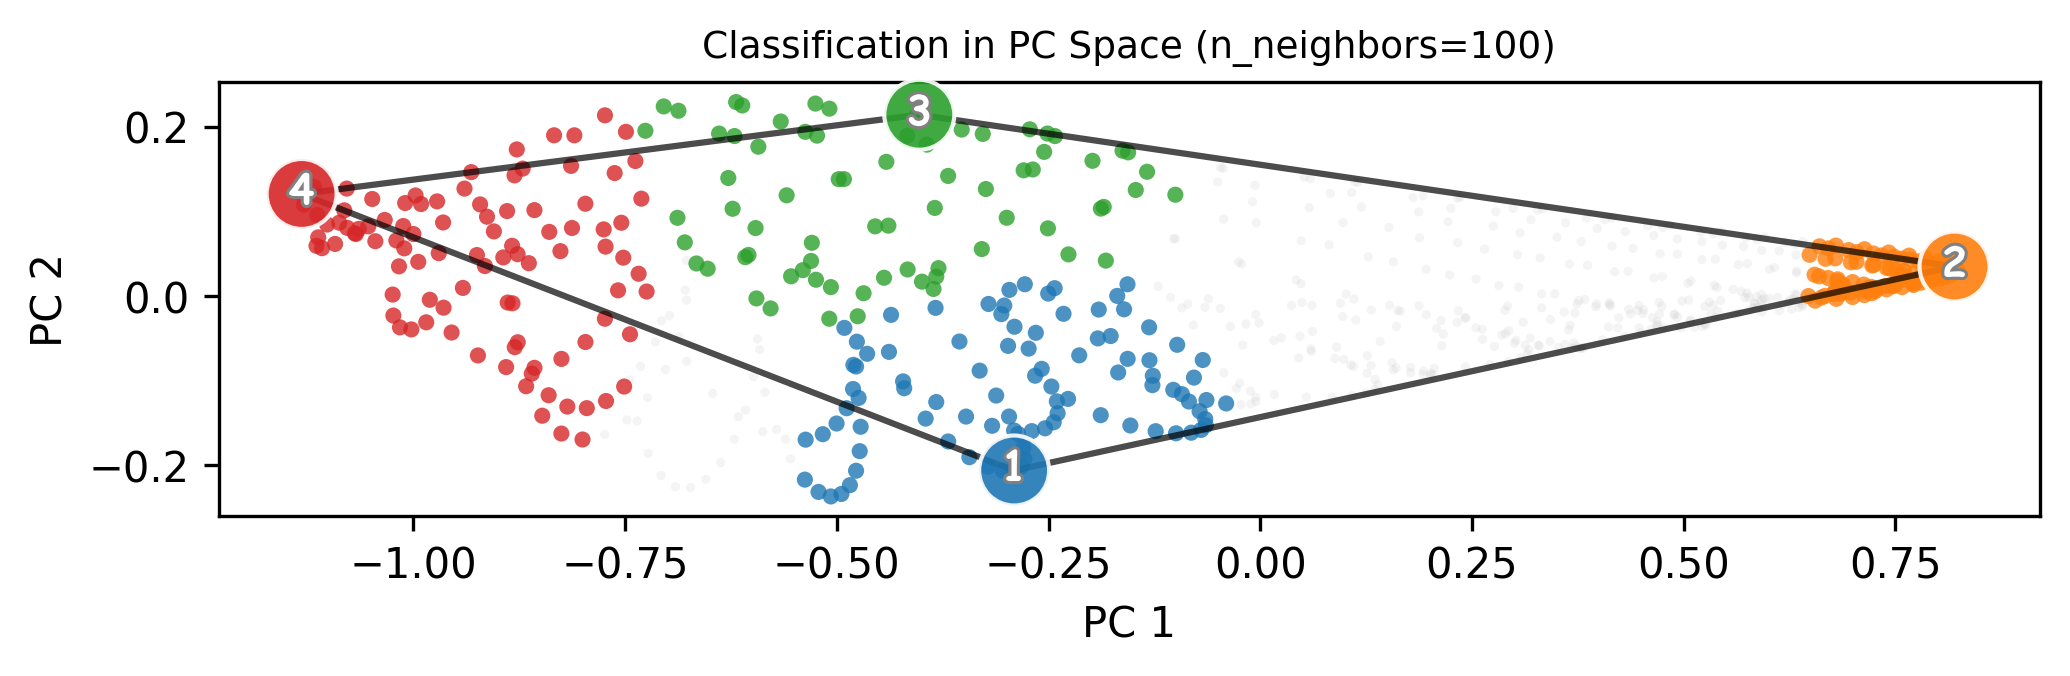

In [32]:
from spectralmap.cluster import find_clusters

# amplitudes = np.ones(I_all_wl.shape[0])  # Placeholder for actual amplitude scaling per wavelength
# F_all_wl = I_all_wl * amplitudes[:, None] *np.pi
# F_cov_all_wl = I_cov_all_wl * (np.pi * amplitudes[:, None, None])**2
# F_var_all_wl = np.diagonal(F_cov_all_wl, axis1=1, axis2=2)
# F_all_wl[F_all_wl<0] = 1e-6

F_regionals, F_regional_errs, labels = find_clusters(
    F_all_wl,
    F_cov_all_wl,
    n_corners=4,
    n_neighbors=100,
)


print('F_regionals shape:', F_regionals.shape)
print('F_regional_errs shape:', F_regional_errs.shape)
print('labels unique (full map):', np.unique(labels))

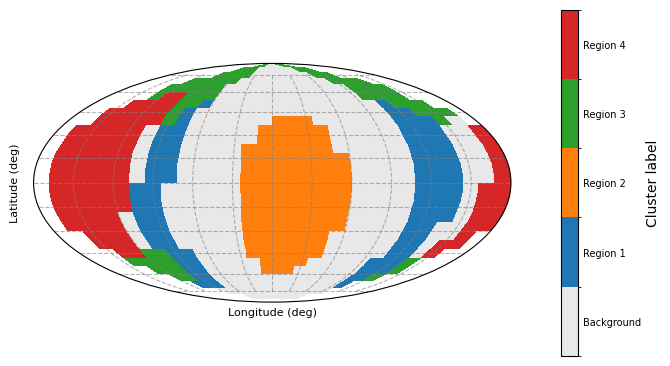

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from spectralmap.utilities import plot_mollweide_labels
from matplotlib import colors as mcolors

colors_list = ['#E8E8E8']  # Background
region_colors = plt.get_cmap('tab10').colors
N = len(F_regionals)
for i in range(N - 1):
    colors_list.append(region_colors[i % len(region_colors)])

cluster_names = ["Background"] + [f"Region {i+1}" for i in range(N - 1)]
cmap = mcolors.ListedColormap(colors_list)

fig, ax, pcm, cb = plot_mollweide_labels(
    labels_masked=labels,      # should be ints 0..N-1 on masked pixels
    moll_mask=maps.moll_mask,
    map_res=maps.map_res,
    cmap=cmap,
    names=cluster_names,
    extrapolate=False
)

In [34]:
import numpy as np
from pathlib import Path
from urllib.request import urlretrieve
from urllib.error import HTTPError, URLError
from scipy.optimize import leastsq
from scipy.interpolate import interp1d

# Optional dependency for reading PHOENIX FITS files
try:
    from astropy.io import fits
except ImportError as exc:
    raise ImportError("Please install astropy to use PHOENIX stellar models: pip install astropy") from exc

# Physical Constants
c = 2.998e8   # Speed of light values from ExFig3.py
h = 6.626e-34 # Planck constant
kb = 1.381e-23 # Boltzmann constant

# PHOENIX model config (Husser et al. 2013 grid)
PHOENIX_CACHE_DIR = Path("data/phoenix")
PHOENIX_WAVE_FILE = "WAVE_PHOENIX-ACES-AGSS-COND-2011.fits"
PHOENIX_BASE_URL = "https://phoenix.astro.physik.uni-goettingen.de/data/HiResFITS/PHOENIX-ACES-AGSS-COND-2011"
PHOENIX_WAVE_URL = "https://phoenix.astro.physik.uni-goettingen.de/data/HiResFITS/WAVE_PHOENIX-ACES-AGSS-COND-2011.fits"

def _candidate_phoenix_locations(teff=4500, logg=4.5, metallicity=0.0):
    """Return candidate (folder, filename) pairs for robust PHOENIX download."""
    if abs(metallicity) < 1e-12:
        # Some proxy/server setups expose only Z-0.0 for solar metallicity.
        tags = [("-", "0.0"), ("+", "0.0")]
    else:
        sign = "+" if metallicity > 0 else "-"
        tags = [(sign, f"{abs(metallicity):.1f}")]

    candidates = []
    for z_sign, z_str in tags:
        z_folder = f"Z{z_sign}{z_str}"
        model_name = f"lte{int(teff):05d}-{logg:.2f}{z_sign}{z_str}.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits"
        candidates.append((z_folder, model_name))
    return candidates

def _download_phoenix_if_needed(teff=4500, logg=4.5, metallicity=0.0):
    PHOENIX_CACHE_DIR.mkdir(parents=True, exist_ok=True)
    wave_path = PHOENIX_CACHE_DIR / PHOENIX_WAVE_FILE

    model_path = None
    download_errors = []

    for z_folder, model_name in _candidate_phoenix_locations(teff=teff, logg=logg, metallicity=metallicity):
        candidate_path = PHOENIX_CACHE_DIR / model_name
        if candidate_path.exists():
            model_path = candidate_path
            break

        model_url = f"{PHOENIX_BASE_URL}/{z_folder}/{model_name}"
        try:
            print(f"Downloading PHOENIX stellar model: {model_name}")
            urlretrieve(model_url, candidate_path)
            model_path = candidate_path
            break
        except (HTTPError, URLError) as exc:
            download_errors.append(f"{model_url} -> {exc}")

    if model_path is None:
        joined = "\n".join(download_errors)
        raise RuntimeError(
            "Could not download a PHOENIX model file. Tried:\n"
            f"{joined}\n"
            "You can also place the needed FITS files manually under data/phoenix/."
        )

    if not wave_path.exists():
        print("Downloading PHOENIX wavelength grid")
        try:
            urlretrieve(PHOENIX_WAVE_URL, wave_path)
        except (HTTPError, URLError) as exc:
            raise RuntimeError(
                "Failed to download PHOENIX wavelength grid from:\n"
                f"{PHOENIX_WAVE_URL}\n"
                f"Error: {exc}\n"
                "Download it manually and place it at data/phoenix/WAVE_PHOENIX-ACES-AGSS-COND-2011.fits"
            ) from exc

    return model_path, wave_path

def load_phoenix_stellar_radiance(teff=4500, logg=4.5, metallicity=0.0):
    """
    Returns interpolator I_lambda(lambda_um) for stellar radiance in W/m^2/sr/m.
    Uses PHOENIX surface flux and converts F_lambda -> I_lambda = F_lambda / pi.
    """
    model_path, wave_path = _download_phoenix_if_needed(teff=teff, logg=logg, metallicity=metallicity)

    with fits.open(model_path, memmap=True) as hdul_model:
        # PHOENIX high-res surface flux in erg/s/cm^2/cm
        flux_cgs = np.asarray(hdul_model[0].data, dtype=float).ravel()

    with fits.open(wave_path, memmap=True) as hdul_wave:
        # Wavelength grid in Angstrom
        wave_angstrom = np.asarray(hdul_wave[0].data, dtype=float).ravel()

    # Convert wavelength to microns
    wave_um = wave_angstrom * 1e-4

    # Convert F_lambda [erg/s/cm^2/cm] -> [W/m^2/m], then divide by pi to get radiance
    flux_si = flux_cgs * 0.1
    radiance_si = flux_si / np.pi

    valid = np.isfinite(wave_um) & np.isfinite(radiance_si) & (wave_um > 0) & (radiance_si > 0)
    wave_um = wave_um[valid]
    radiance_si = radiance_si[valid]

    return interp1d(
        wave_um,
        radiance_si,
        kind="linear",
        bounds_error=False,
        fill_value=(radiance_si[0], radiance_si[-1]),
        assume_sorted=False,
    )

F_regionals shape: (5, 2)
F_regionals mean: 0.001559293727887418
Tb_all shape: (5, 2)
Tb_all mean: 1170.7585843159216


Text(0, 0.5, 'Brightness Temperature (K)')

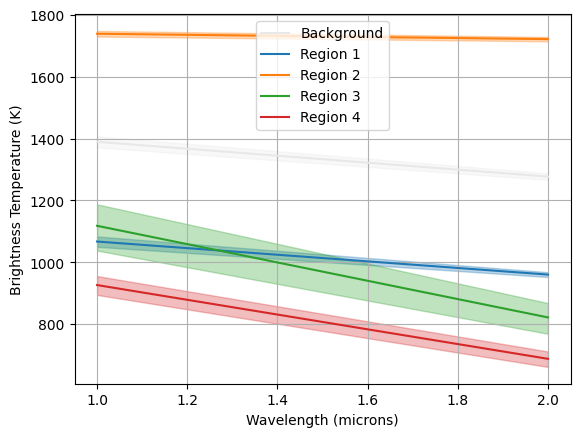

In [35]:
# Load throughput data once globally to avoid reading file in loops
try:
    throughput_data = np.loadtxt('../eigenspectra/ExFig3/niriss_order1.txt')
except OSError:
    print("Warning: Throughput file not found. Ensure path is correct.")
    throughput_data = None

# Build PHOENIX stellar model interpolator for WASP-43 host star
stellar_radiance_model = load_phoenix_stellar_radiance(teff=4500, logg=4.5, metallicity=0.0)

# --- Example Usage ---
RpRs = 0.1588 # From ExFig3.py
print("F_regionals shape:", F_regionals.shape)
print("F_regionals mean:", np.mean(F_regionals))

# Fix applied: Convert Starry Intensity to Eclipse Depth (Flux)
# Starry Intensity I integrates to Flux F = pi * I on the unit disk
# The conversion function expects Flux (Eclipse Depth), so we multiply by pi.
Tb_all = depth_to_tb_broadband(F_regionals, wl_band, dlam_band, RpRs, stellar_model=stellar_radiance_model, t_star=4500)
Tb_upper_all = depth_to_tb_broadband((F_regionals + F_regional_errs), wl_band, dlam_band, RpRs, stellar_model=stellar_radiance_model, t_star=4500)
Tb_lower_all = depth_to_tb_broadband((F_regionals - F_regional_errs), wl_band, dlam_band, RpRs, stellar_model=stellar_radiance_model, t_star=4500)
Tb_lower_all[np.isnan(Tb_lower_all)] = 1e-6
print("Tb_all shape:", Tb_all.shape)
print("Tb_all mean:", np.mean(Tb_all))


for i in range(len(Tb_all)):
    if i==0:
        label='Background'
    else:
        label=f'Region {i}'
    plt.plot(wl, Tb_all[i], color=colors_list[i % len(colors_list)], label=label)
    plt.fill_between(wl, Tb_lower_all[i], Tb_upper_all[i], color=colors_list[i % len(colors_list)], alpha=0.3)
plt.grid()
plt.legend(loc='best')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Brightness Temperature (K)')